In [1]:
from PIL import Image
import os
import numpy as np
import random
import functools as ft
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
total = np.zeros((1024,1)) #resetting
total_array = np.zeros((1024,1)) #resetting
total_array_test = np.zeros((1024,1))                       #for this cell, this is the same as the one in the PCA, setting up 
count = 0 #resetting                                        #training set and test set in preparation for KNN, and also facilitate 
count_test = 0                                             # in performing LDA
DIR = (r'C:\Users\zhou yiqi\Desktop\EE5907_CA2\PIE') #amend the top
#print(np.arange(1,69))
for item in np.arange(1,25):
    path = os.path.join(DIR, str(item)) #get all the available 68 subjects
    dirs = os.listdir(path)
    random.shuffle(dirs)
    for item in dirs[0:20]:
    
        image = Image.open(os.path.join(path, str(item)))
        image_array = np.array(image)                          ##this one is talking about one folder you open up how many images
        image_array_reshaped = image_array.reshape((1024,1))
        total += image_array_reshaped
        count += 1
        if count == 1:
            total_array = total
        
        else:
            total_array = np.append(total_array,image_array_reshaped, axis = 1)
            
    for item in dirs[20:71]:
    
        image = Image.open(os.path.join(path, str(item)))
        image_array = np.array(image)                          ##this one is talking about one folder you open up how many images
        image_array_reshaped = image_array.reshape((1024,1))
        #total += image_array_reshaped
        count_test += 1
        if count_test == 1:
            total_array_test = image_array_reshaped        
        else:
            total_array_test = np.append(total_array_test,image_array_reshaped, axis = 1)
    #print(total)
    #print(total_array)
#print(len(total))
#print(len(total_array[0]))

path = (r'C:\Users\zhou yiqi\Desktop\EE5907_CA2\PIE\25')
dirs = os.listdir(path)
random.shuffle(dirs)

for item in dirs[0:13]:
    
    image = Image.open(os.path.join(path, str(item)))
    image_array = np.array(image)                          ##this one is talking about one folder you open up how many images
    image_array_reshaped = image_array.reshape((1024,1))
    total += image_array_reshaped
    count += 1
    total_array = np.append(total_array,image_array_reshaped, axis = 1)
    
for item in dirs[13:64]:
    
    image = Image.open(os.path.join(path, str(item)))
    image_array = np.array(image)                          ##this one is talking about one folder you open up how many images
    image_array_reshaped = image_array.reshape((1024,1))
    #total += image_array_reshaped
    count_test += 1
    total_array_test = np.append(total_array_test,image_array_reshaped, axis = 1)
#    print(total)
#print(len(total))

path = (r'C:\Users\zhou yiqi\Desktop\EE5907_CA2\Yidi\Yidi_Grey')
dirs = os.listdir(path)
random.shuffle(dirs)
total_selfie = np.zeros((1024,1))
total_array_selfie = np.zeros((1024,1))
total_array_selfie_test = np.zeros((1024,1))
count_selfie = 0
count_selfie_test = 0

for item in dirs[0:7]:
    
    image = Image.open(os.path.join(path, str(item)))
    image_array = np.array(image)                          ##this one is talking about one folder you open up how many images
    image_array_reshaped = image_array.reshape((1024,1))
    total_selfie += image_array_reshaped
    count_selfie += 1
    
    if count_selfie == 1:
        total_array_selfie = total_selfie
    else:
        total_array_selfie = np.append(total_array_selfie,image_array_reshaped, axis = 1) 
        
for item in dirs[7:]:
    
    image = Image.open(os.path.join(path, str(item)))
    image_array = np.array(image)                          ##this one is talking about one folder you open up how many images
    image_array_reshaped = image_array.reshape((1024,1))
    #total_selfie += image_array_reshaped
    count_selfie_test += 1
    
    if count_selfie_test == 1:
        total_array_selfie_test = image_array_reshaped
    else:
        total_array_selfie_test = np.append(total_array_selfie_test,image_array_reshaped, axis = 1)   
            
    #print(total)
print(len(total))
avg = total / 493
avg_selfie = total_selfie / 7
print(avg)
print(len(avg))

1024
[[41.52535497]
 [44.86815416]
 [49.50709939]
 ...
 [48.29208925]
 [49.73630832]
 [53.39553753]]
1024


In [3]:
print(total_array_test.shape)
print(total_array_selfie_test.shape)

(1024, 1275)
(1024, 3)


In [4]:
print(avg_selfie)
print(len(avg_selfie))

[[ 89.71428571]
 [ 69.        ]
 [ 57.85714286]
 ...
 [114.71428571]
 [104.42857143]
 [ 98.57142857]]
1024


In [3]:
avg_subtract = avg_selfie - avg
SSB = np.dot(avg_subtract, avg_subtract.transpose()) #compute SSB
print(avg_subtract)
print(avg_subtract.shape)
print(SSB)
print(SSB.shape)

[[  3.90321646]
 [ -8.43958273]
 [-22.36424225]
 ...
 [ 57.99362504]
 [ 48.12083454]
 [ 38.74731962]]
(1024, 1)
[[   15.23509873   -32.94151822   -87.29247844 ...   226.36167176
    187.8260334    151.23917567]
 [  -32.94151822    71.22655665   188.74487264 ...  -489.44199629
   -406.11976413  -327.01120946]
 [  -87.29247844   188.74487264   500.15933136 ... -1296.98347919
  -1076.18600087  -866.55444241]
 ...
 [  226.36167176  -489.44199629 -1296.98347919 ...  3363.26054484
   2790.70163478  2247.09752506]
 [  187.8260334   -406.11976413 -1076.18600087 ...  2790.70163478
   2315.61471689  1864.55335621]
 [  151.23917567  -327.01120946  -866.55444241 ...  2247.09752506
   1864.55335621  1501.35477754]]
(1024, 1024)


In [4]:
SS = np.zeros((1024,1024))
SS_selfie = np.zeros((1024,1024))

for i in range(493):
    minus_avg = np.subtract(total_array, avg).transpose()[i]
    no_transpose = np.reshape(minus_avg, (-1, 1))
    transp = np.reshape(minus_avg, (-1, 1)).transpose() #intermediate steps for computing SSW
    matrix_mul = np.dot(no_transpose, transp)
    SS += matrix_mul

for i in range(7):
    minus_avg = np.subtract(total_array_selfie, avg_selfie).transpose()[i] #intermediate steps for computing SSW
    no_transpose = np.reshape(minus_avg, (-1, 1))
    transp = np.reshape(minus_avg, (-1, 1)).transpose()
    matrix_mul = np.dot(no_transpose, transp)
    SS_selfie += matrix_mul
    
SSW = SS + SS_selfie #computing SSW

print(SSW)
print(SSW.shape)
print(np.linalg.inv(SSW))
print(np.linalg.inv(SSW).shape)
#print(minus_avg)
#print(no_transpose)
#print(transp)
#matrix_mul = np.dot(no_transpose, transp)

[[1005695.90901188  848506.32280498  718667.74326282 ... -159057.13880035
  -145758.87510866 -122101.34279919]
 [ 848506.32280498  900827.00028977  863958.8426543  ... -120274.57693422
  -106222.83454071  -64478.168357  ]
 [ 718667.74326282  863958.8426543   989058.69718922 ...  -79376.50709939
   -75508.15763547  -19764.58707621]
 ...
 [-159057.13880035 -120274.57693422  -79376.50709939 ... 1768362.43436685
  1730677.71602434 1638599.11503912]
 [-145758.87510866 -106222.83454071  -75508.15763547 ... 1730677.71602434
  2019024.66067806 1994860.5972182 ]
 [-122101.34279919  -64478.168357    -19764.58707621 ... 1638599.11503912
  1994860.5972182  2275545.57896262]]
(1024, 1024)
[[  4627991.64301619 -17952122.12340843  -8967142.70635838 ...
   10748256.26350438  20664650.89727546 -32240969.47817167]
 [ 46422992.46877684 -64752022.28109615   1164394.86159522 ...
   -7953519.90748756 -43135050.64449275 -11282293.2426729 ]
 [-16639777.65929113  41790748.88396796 -62859823.21144377 ...
   -62

In [5]:
SSW_SSB = np.dot(np.linalg.inv(SSW), SSB) #matrix multiply the inverse of SSW with SSB
#SSW_SSB = np.dot(SSB, np.linalg.inv(SSW))
print(SSW_SSB.shape)

(1024, 1024)


In [6]:
u, s, vh = np.linalg.svd(SSW_SSB, full_matrices=False) #performing SVD in order to get the eigenvectors
s_reshape = np.reshape(s, (-1, 1))
concatenated_u = np.concatenate((u.transpose(),s_reshape),axis=1)
sorted_concatenated_u = concatenated_u[concatenated_u[:, -1].argsort()][::-1][:, 0:1024]
#print(u)
#print(s)
print(sorted_concatenated_u)

finalized_component = np.dot(sorted_concatenated_u[0:2],total_array)
finalized_component_selfie = np.dot(sorted_concatenated_u[0:2],total_array_selfie) #intermediate steps for LDA classification 
finalized_component_test = np.dot(sorted_concatenated_u[0:2],total_array_test) #and to plot 2D, 3D plots.
finalized_component_selfie_test = np.dot(sorted_concatenated_u[0:2],total_array_selfie_test)

print(finalized_component)
print(len(finalized_component[1]))
print(finalized_component_selfie)
print(finalized_component_test.shape)
print(finalized_component_selfie_test.shape)
print(finalized_component.shape)
print(finalized_component_selfie.shape)

#print(vh)
#print(np.diag(s))
#print(np.dot(u,np.diag(s)))
#print(np.dot(SSW_SSB,np.linalg.inv(vh)))

#print(u.shape)
#print(vh.shape)

[[-0.02889202 -0.01145072  0.02199392 ...  0.0366492  -0.0343595
   0.02388479]
 [ 0.00606425 -0.0016967   0.02034251 ... -0.01290038  0.00649004
   0.00034583]
 [ 0.00597673  0.011883   -0.02173982 ... -0.00403847  0.00935202
   0.03595989]
 ...
 [-0.00800831 -0.01527426 -0.05416659 ...  0.00306919  0.01075287
   0.04309758]
 [-0.00905097  0.04019727 -0.03229027 ...  0.03372087  0.00496899
  -0.03885105]
 [ 0.00085665 -0.0009809  -0.00889356 ... -0.03399363  0.01308316
   0.01623405]]
[[  -0.98690985   -0.98461233   -0.9850772    -0.98736305   -0.98585216
    -0.98746174   -0.98837401   -0.98549164   -0.98730348   -0.9872435
    -0.98693451   -0.98655357   -0.98583476   -0.98790912   -0.98654691
    -0.98712413   -0.98656692   -0.98646664   -0.98637567   -0.98843561
    -0.98564835   -0.98596447   -0.98567322   -0.98713354   -0.9875008
    -0.98597934   -0.98625817   -0.98592577   -0.98574147   -0.9845968
    -0.98651254   -0.98809617   -0.98821999   -0.98736479   -0.98808877
    -0.9

<IPython.core.display.Javascript object>


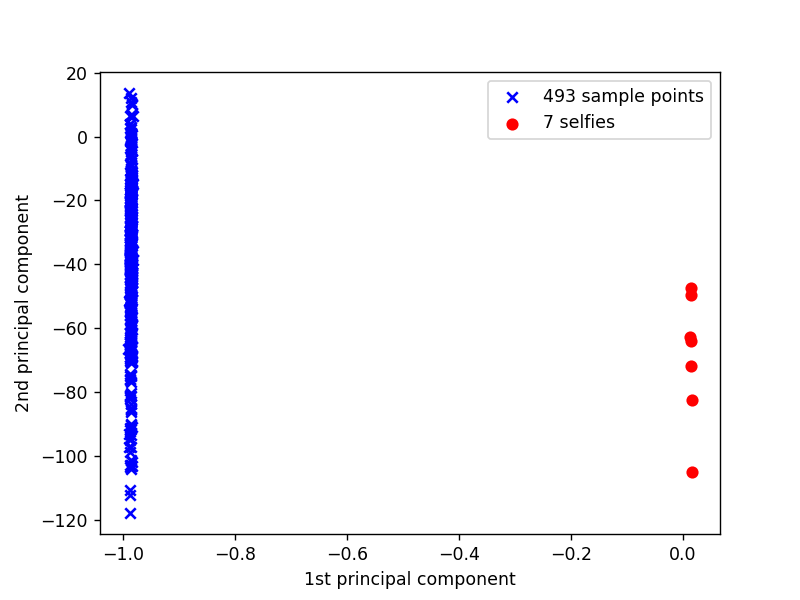

In [7]:
X = finalized_component[0]
Y = finalized_component[1]
X1 = finalized_component_selfie[0]
Y1 = finalized_component_selfie[1]
X2 = finalized_component_selfie_test[0]
Y2 = finalized_component_selfie_test[1]
X3 = finalized_component_test[0]
Y3 = finalized_component_test[1]
#print(transformed_data)
#print(len(transformed_data))
#print(len(transformed_data[4]))
#print(transformed_data_selfie)
#print(len(transformed_data_selfie))
#print(len(transformed_data_selfie[4]))
plt.scatter(X,Y, c = 'b', marker='x', label = '493 sample points') #This cell is plotting 2D plots. Reader can look at output of
plt.scatter(X1,Y1, c = 'r', marker='o', label = '7 selfies') #cell for better understanding.
#plt.scatter(X2,Y2, c = 'g', marker='o', label = '3 selfies test')
#plt.scatter(X3,Y3, c = 'orange', marker='.', label = 'PIE test set')
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


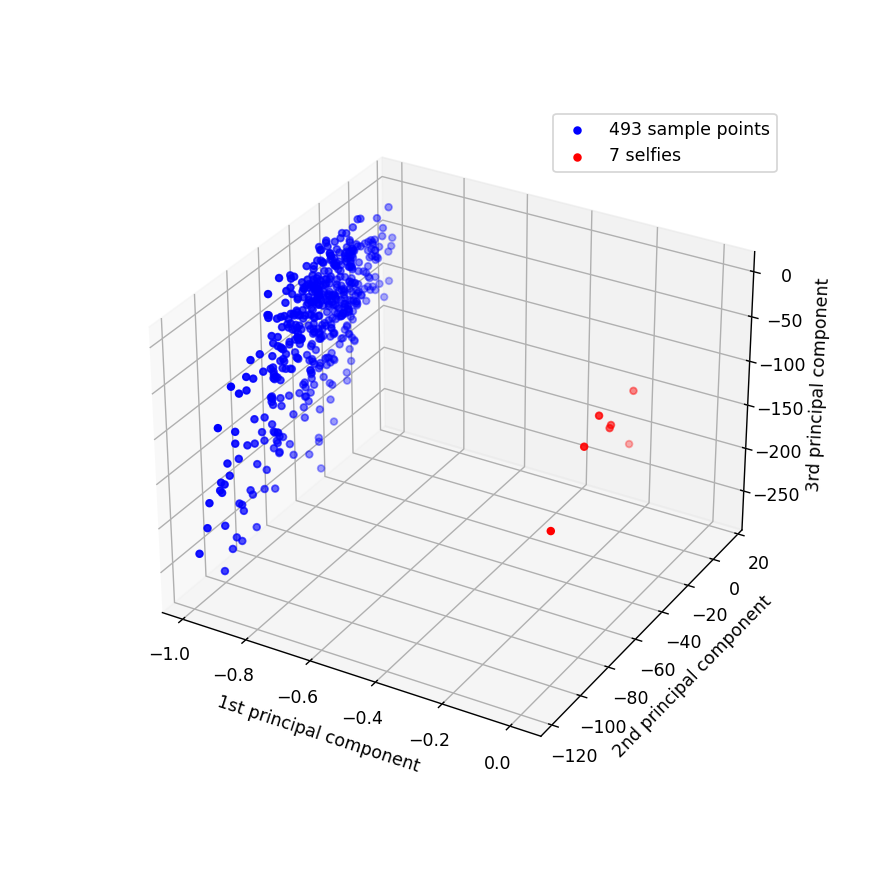

In [8]:
finalized_component = np.dot(sorted_concatenated_u[0:3],total_array)
finalized_component_selfie = np.dot(sorted_concatenated_u[0:3],total_array_selfie)


fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection = '3d')
X = finalized_component[0]     #This cell is plotting 3D plots. Reader can look at output of cell for better understanding.
Y = finalized_component[1]
Z = finalized_component[2]
X1 = finalized_component_selfie[0]
Y1 = finalized_component_selfie[1]
Z1 = finalized_component_selfie[2]
ax.scatter(X,Y,Z, c = 'b', marker='o', label = '493 sample points', s=15)
ax.scatter(X1,Y1,Z1, c = 'r', marker='o', label = '7 selfies', s=15)
ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component')
ax.set_zlabel('3rd principal component')


plt.legend(prop={"size":10})
#plt.legend(fontsize=15)
plt.show()

In [16]:
finalized_component_test = np.dot(sorted_concatenated_u[0:9],total_array_test) #change these dimensions
finalized_component_selfie_test = np.dot(sorted_concatenated_u[0:9],total_array_selfie_test) #change these dimensions
finalized_component = np.dot(sorted_concatenated_u[0:9],total_array) #change these dimensions
finalized_component_selfie = np.dot(sorted_concatenated_u[0:9],total_array_selfie) #change these dimensions

# This cell is doing the KNN for LDA, instead of using sklearn library. This is manually written by the author. The code above
# can be toggled in order to change the dimensionality of 2,3 and 9. The above code is showing for dimensionality of 9, you can
# change the value of 9 to 2/3.
correct = 0
correct_selfie = 0
for j in range(3):
    
    subtract_then_sqrt = (np.subtract(finalized_component.transpose(),finalized_component_selfie_test.transpose()[j]))**2
    sum_then_sqrt = np.sqrt(np.sum(subtract_then_sqrt, axis = 1))
    sum_then_sqrt = np.reshape(sum_then_sqrt, (-1, 1))
    concatenated_transformed_data = np.concatenate((np.ones((493,1)),sum_then_sqrt),axis=1)

    subtract_then_sqrt = (np.subtract(finalized_component_selfie.transpose(),finalized_component_selfie_test.transpose()[j]))**2 #done
    sum_then_sqrt = np.sqrt(np.sum(subtract_then_sqrt, axis = 1))
    sum_then_sqrt = np.reshape(sum_then_sqrt, (-1, 1))
    concatenated_transformed_data_selfie = np.concatenate((np.zeros((7,1)),sum_then_sqrt),axis=1)
    combined = np.concatenate((concatenated_transformed_data, concatenated_transformed_data_selfie), axis=0)
    sorted_combined = combined[combined[:, -1].argsort()]

    K_chopped_transpose = sorted_combined[0:1].transpose() #Extracting the k nearest neighbour #quite important to change K here
    if sum(K_chopped_transpose[0]) > (0.5 * 1): #you need to change the 100 to K #quite important to change K here
        predict = 1 #doing the prediction
    else:
        predict = 0 #doing the prediction
            #print(predict)
    if predict == 0: #checking with ytest in order to compute the test error rate 
        correct_selfie += 1
        
for j in range(1275):
    
    subtract_then_sqrt = (np.subtract(finalized_component.transpose(),finalized_component_test.transpose()[j]))**2
    sum_then_sqrt = np.sqrt(np.sum(subtract_then_sqrt, axis = 1))
    sum_then_sqrt = np.reshape(sum_then_sqrt, (-1, 1))
    concatenated_transformed_data = np.concatenate((np.ones((493,1)),sum_then_sqrt),axis=1)

    subtract_then_sqrt = (np.subtract(finalized_component_selfie.transpose(),finalized_component_test.transpose()[j]))**2 #done
    sum_then_sqrt = np.sqrt(np.sum(subtract_then_sqrt, axis = 1))
    sum_then_sqrt = np.reshape(sum_then_sqrt, (-1, 1))
    concatenated_transformed_data_selfie = np.concatenate((np.zeros((7,1)),sum_then_sqrt),axis=1)
    combined = np.concatenate((concatenated_transformed_data, concatenated_transformed_data_selfie), axis=0)
    sorted_combined = combined[combined[:, -1].argsort()]

    K_chopped_transpose = sorted_combined[0:1].transpose() #Extracting the k nearest neighbour
    if sum(K_chopped_transpose[0]) > (0.5 * 1): #you need to change the 100 to K
        predict = 1 #doing the prediction
    else:
        predict = 0 #doing the prediction
            #print(predict)
    if predict == 1: #checking with ytest in order to compute the test error rate 
        correct += 1
        #print(correct_selfie)
#print(concatenated_transformed_data)
#print(concatenated_transformed_data_selfie)
#print(sorted_combined)
print(correct_selfie/3) #printing selfie accuracy
print(correct/1275) #printing CMU PIE accuracy

0.6666666666666666
0.9976470588235294
